# 01. Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data

In [2]:
# Create path
path = r'/Users/chadstacey/04-01-2021_InstaCart_Basket_Analysis'

In [3]:
# Import latest version of merged project dataset
ords_prods_merge = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'ords_prods_with_flags.pkl'))

In [4]:
ords_prods_merge.shape

(32404859, 23)

# 03. Bar charts

<AxesSubplot:>

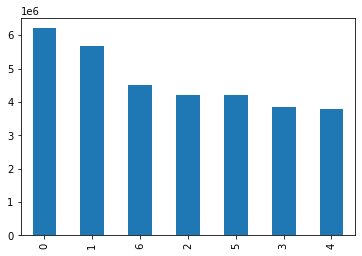

In [5]:
# plot bar chart showing frequency of orders on each day of week
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

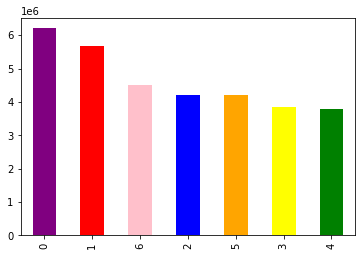

In [6]:
# add colours 
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'blue', 'orange', 'yellow', 'green'])

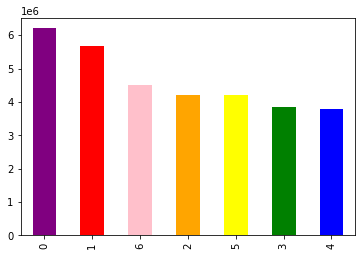

In [7]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [8]:
# Export bar
bar.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_orders_dow.png'))

# 04. Histograms and scatterplots 

<AxesSubplot:ylabel='Frequency'>

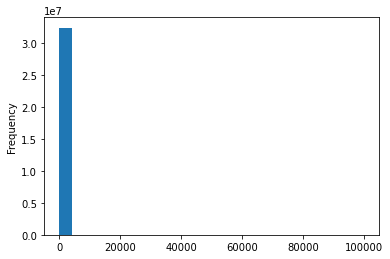

In [9]:
# Plot histogram for prices 
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

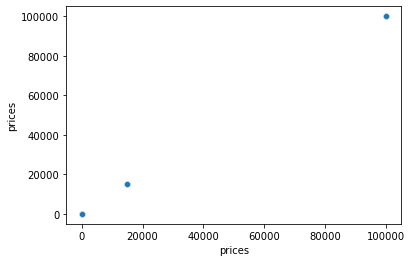

In [10]:
# Plot scatterplot 
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [11]:
# Check for outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

order_id  user_id  order_number  orders_day_of_week  \
10030345    912404       17            12                   2   
10030346    603376       17            22                   6   
10030347   3264360      135             2                   2   
10030348    892534      135             3                   0   
10030349    229704      342             8                   1   
...            ...      ...           ...                 ...   
29166209   2249946   204099            29                   0   
29166210   2363282   204099            31                   0   
29166211   3181945   204395            13                   3   
29166212   2486215   205227             7                   3   
29166213   2232716   205227            10                   0   

          order_hour_of_day  days_since_prior_order  product_id  \
10030345                 14                     5.0       21553   
10030346                 16                     4.0       21553   
10030347                 21                    13.0       21553   
10030348                  8                    12.0       21553   
10030349                 19                    30.0       21553   
...                     ...                     ...         ...   
29166209                  8                     4.0       33664   
29166210                  9                     2.0       33664   
29166211                 15                     8.0       33664   
29166212                 20                     4.0       33664   
29166213                 11                     4.0       33664   

          add_to_cart_order  reordered                      product_name  ...  \
10030345                  5          0  Lowfat 2% Milkfat Cottage Cheese  ...   
10030346                  3          1  Lowfat 2% Milkfat Cottage Cheese  ...   
10030347                  6          0  Lowfat 2% Milkfat Cottage Cheese  ...   
10030348                  3          1  Lowfat 2% Milkfat Cottage Cheese  ...   
10030349                  9          0  Lowfat 2% Milkfat Cottage Cheese  ...   
...                     ...        ...                               ...  ...   
29166209                  1          0             2 % Reduced Fat  Milk  ...   
29166210                  1          1             2 % Reduced Fat  Milk  ...   
29166211                 25          0             2 % Reduced Fat  Milk  ...   
29166212                  8          0             2 % Reduced Fat  Milk  ...   
29166213                 23          1             2 % Reduced Fat  Milk  ...   

             price_range_loc     busiest_day     busiest_days  \
10030345  High-range product  Regularly busy   Regularly busy   
10030346  High-range product  Regularly busy   Regularly busy   
10030347  High-range product  Regularly busy   Regularly busy   
10030348  High-range product     Busiest day     Busiest days   
10030349  High-range product  Regularly busy     Busiest days   
...                      ...             ...              ...   
29166209  High-range product     Busiest day     Busiest days   
29166210  High-range product     Busiest day     Busiest days   
29166211  High-range product  Regularly busy  Least busy days   
29166212  High-range product  Regularly busy  Least busy days   
29166213  High-range product     Busiest day     Busiest days   

         busiest_period_of_day max_order      loyalty_flag  \
10030345           Most orders        40  Regular customer   
10030346           Most orders        40  Regular customer   
10030347        Average orders         4      New customer   
10030348           Most orders         4      New customer   
10030349           Most orders        16  Regular customer   
...                        ...       ...               ...   
29166209           Most orders        39  Regular customer   
29166210         Fewest orders        39  Regular customer   
29166211           Most orders        15  Regular customer   
29166212        Average orders        12  Regular 

In [12]:
# Assign missing values 
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [13]:
# Check output 
ords_prods_merge['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

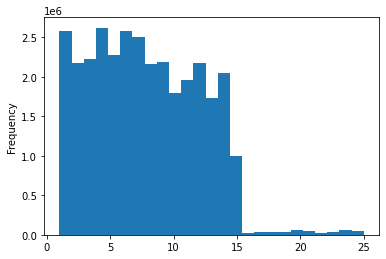

In [14]:
# Re-try plotting histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

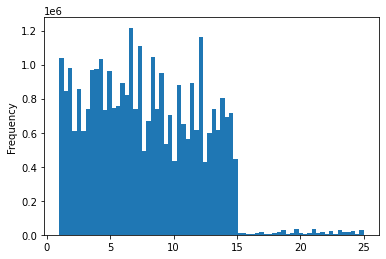

In [15]:
# Increase granularity 
ords_prods_merge['prices'].plot.hist(bins = 70)

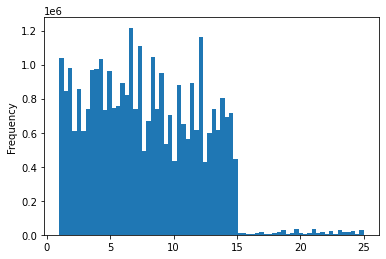

In [16]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [17]:
# Export histogram
hist.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'hist_orders_dow.png'))

# 05. Sampling data 

In [28]:
# Create a list holding true/false values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [29]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [30]:
# Store 70% of the sample in the dataframe big 
big = ords_prods_merge[dev]

In [31]:
# Store 30% of the sample in the dataframe small 
small = ords_prods_merge[~dev]

In [32]:
# Check how many rows
len(ords_prods_merge)

32404859

In [33]:
# Check how many rows 
len(big) + len(small)

32404859

In [34]:
len(small)

9721098

# 06. Line charts 

In [36]:
# Specify which columns
df_2 = small[['orders_day_of_week','prices']]

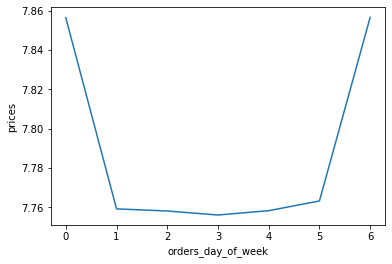

In [38]:
# Create line chart 
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')